## 🔎 Análisis Exploratorio de Datos:

**📊 Descripción de los datos**
  * Nombre de las columnas
  * Tipos de datos
  * Valores nulos
  * Cantidad de valores totales en cada columna
  * Valores duplicados
  * Tamaño de los datos
  * Estadistica descriptiva(cantidad,media,desviacion estandar,minimo,percentil,mediana,percentil 75, màximo)
  * Varianza
* ☁️ Nube de palabras para juegos y desarrolladores

**🕳 Datos faltantes y valores atípicos:**
  * No se observan valores nulos en ninguno de los DataFrames.
  * Se realizará una revisión de valores atípicos en las columnas numéricas durante el análisis.

**🔗 Correlaciones entre variables:**

  * Se calculará la matriz de correlación entre las variables numéricas relevantes:
    * `playtime_forever`
    * `items_count`
    * `price`
    * `release_year`
* Se explorará la relación entre las variables categóricas y numéricas utilizando gráficos de barras o diagramas de caja.

**🔄 Combinación de DataFrames:**

* Para facilitar la visualización, se combinarán los DataFrames en el campo `item_id`:
  * `df_items_games = df_user_items + df_steam_games`
  * `df_steam_games = df_user_reviews + df_steam_games`

**📈 Distribuciones de las variables numéricas:**

* Utilizaremos histogramas y diagramas de caja para analizar las distribuciones de las siguientes variables numéricas:
  * `playtime_forever`
  * `items_count`
  * `release_year`

**📊 Distribuciones de las variables categóricas:**
* Usaremos nubes de palabras aplicadas a los nombres de juegos y desarrolladores.
**🔗 Correlaciones entre variables numéricas:**

**📈 Análisis de serie de tiempo:**

* Cantidad de juegos por año de lanzamiento.

**🏆 Top 10 usuarios:**

* Los 10 usuarios que más tiempo jugaron.

**🎮 Top 10 juegos:**

* Top 10 juegos con más horas jugadas.
* Top 10 juegos según cantidad de usuarios.

**📊 Análisis de grupos (clustering):**

* Basado en variables numéricas como tiempo de juego, precio y año de lanzamiento.

___

### Vamos a realizar un análisis de los datos contenidos en los df de usuarios, reviews y juegos de Steam

Objetivos del análisis:

- Explorar las características de los juegos más populares y los géneros más comunes.
- Analizar el comportamiento de los usuarios en términos de tiempo de juego y número de juegos en su biblioteca.
- Investigar la relación entre las reseñas de los usuarios y las características de los juegos.

Importamos las bibliotecas que vamos a usar

In [3]:
#instalar wordcloud
#%pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ------------- -------------------------- 102.4/300.2 kB 5.8 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/300.2 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 3.7 MB/s eta 0:00:

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import inspect
import ast  # AST (Abstract Syntax Trees) se utiliza para interpretar expresiones Python
import gzip
import json  # JSON se utiliza para trabajar con datos en formato JSON
import os  # OS proporciona funciones para interactuar con el sistema operativo
import warnings  # Warnings se utiliza para gestionar advertencias y filtrarlas si es necesario
import seaborn as sns


# Suprimir todos los warnings
warnings.filterwarnings("ignore")

import data_utils
from data_utils import data_type_check, data_type_check_EDA, descomprimir_archivos_gz

📦 Extracción de los conjuntos de datos que vamos a usar

In [5]:
df_steam_games = pd.read_parquet('../0 Dataset/1.1_steam_games_LISTO.parquet')
df_user_items = pd.read_parquet('../0 Dataset/1.2_users_items_LISTO.parquet')
df_user_reviews = pd.read_parquet('../0 Dataset/1.3_user_review_sentiment.parquet')

### Descripción de los datos:
Con la ayudar de una funcion personalizada, vamos a explorar la siguiente informacion de los dataframe:
- Nombre de las columnas
- Tipos de datos
- Valores nulos
- Cantidad de valores totales en cada columna
- Valores duplicados

Tambien vamos a consultar la estadística descriptiva de cada dataframe.

#### **📦 df_user_items** : Contiene información sobre los juegos jugados por usuarios y el tiempo acumulado.
* Variables:
  * **item_id** 🎮: Identificador único del juego.
  * **item_name** 🎮: Nombre del juego.
  * **playtime_forever** ⏰: Tiempo acumulado de juego. (convertido a horas)
  * **items_count** 📊: Cantidad de juegos consumidos por el usuario.
  * **user_id** 👤: Identificador único del usuario.



 Resumen del DataFrame 'df_user_items': 

Dimensiones:  (3246375, 5)
            columna  no_nulos  %_no_nulos  nulos  %_nulos tipo_dato
0           user_id   3246375       100.0      0      0.0    string
1       items_count   3246375       100.0      0      0.0     int64
2           item_id   3246375       100.0      0      0.0    object
3         item_name   3246375       100.0      0      0.0    object
4  playtime_forever   3246375       100.0      0      0.0   float64


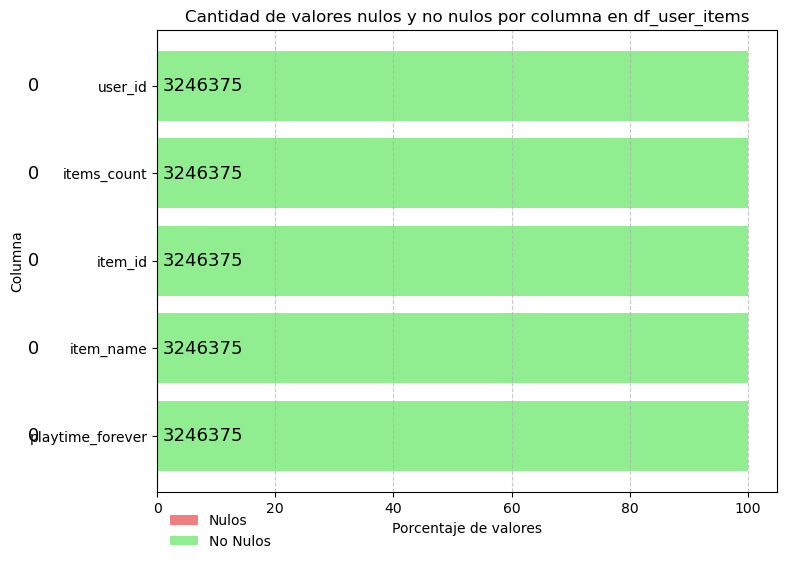

Valores duplicados: 


13

In [6]:
data_type_check_EDA(df_user_items)
#valores duplicados en df_user_items
print("Valores duplicados: ") 
df_user_items.duplicated().sum()

In [7]:
# Estadísticas descriptivas para df_user_items
print("Estadísticas descriptivas para df_user_items:")
print(df_user_items.describe())

Estadísticas descriptivas para df_user_items:
        items_count  playtime_forever
count  3.246375e+06      3.246375e+06
mean   2.480114e+02      2.590567e+01
std    5.683669e+02      1.119564e+02
min    1.000000e+00      1.666667e-02
25%    6.500000e+01      7.333333e-01
50%    1.220000e+02      3.416667e+00
75%    2.280000e+02      1.346667e+01
max    7.762000e+03      1.071288e+04


Estadísticas descriptivas para df_user_items
* Cantidad de elementos (items_count):
  * Count (cantidad): Hay un total de 3,246,375 registros de la cantidad de elementos.
  * Media: La cantidad promedio de elementos por usuario es aproximadamente 248.01.
  * Desviación estándar: La desviación estándar de la cantidad de elementos es de alrededor de 568.37, lo que indica una gran variabilidad en la cantidad de elementos entre los usuarios.
  * Mínimo: El usuario con menos elementos tiene solo 1.
  * Percentil 25 (25%): El 25% de los usuarios tienen 65 elementos o menos.
  * Mediana (percentil 50 o 50%): La mediana de la cantidad de elementos por usuario es 122, lo que significa que la mitad de los usuarios tienen 122 elementos o menos.
  * Percentil 75 (75%): El 75% de los usuarios tienen 228 elementos o menos.
  * Máximo: El usuario con más elementos tiene 7,762.
* Tiempo de juego (playtime_forever):
  * Count (cantidad): Hay un total de 3,246,375 registros de tiempo de juego.
  * Media: El tiempo de juego promedio por usuario es de aproximadamente 25.91 horas.
  * Desviación estándar: La desviación estándar del tiempo de juego es de alrededor de 111.96 horas, lo que indica una gran variabilidad en el tiempo de juego entre los usuarios.
  * Mínimo: El usuario con menos tiempo de juego registrado tiene aproximadamente 0.017 horas (alrededor de 1 minuto).
  * Percentil 25 (25%): El 25% de los usuarios tienen un tiempo de juego de 0.73 horas o menos.
  * Mediana (percentil 50 o 50%): La mediana del tiempo de juego es de aproximadamente 3.42 horas, lo que significa que la mitad de los usuarios tienen un tiempo de juego de 3.42 horas o menos.
  * Percentil 75 (75%): El 75% de los usuarios tienen un tiempo de juego de 13.47 horas o menos.
  * Máximo: El usuario con más tiempo de juego registrado tiene aproximadamente 10,713 horas.

#### **🎮 steam_games.json** :
Contiene datos relacionados con los juegos.

* Variables:
  * **genres** 🎮: Género del juego (lista de géneros).
  * **app_name** 📜: Nombre del juego.
  * **url** 🔗: URL del juego.
  * **price** 💰: Precio del juego.
  * **id** 🔢: Identificador único del contenido.
  * **developer** 👨‍💻: Desarrollador del contenido.
  * **release_year** 📅: Año de lanzamiento 
 


 Resumen del DataFrame 'df_steam_games': 

Dimensiones:  (32132, 7)
        columna  no_nulos  %_no_nulos  nulos  %_nulos tipo_dato
0        genres     32132       100.0      0      0.0    object
1      app_name     32132       100.0      0      0.0    string
2           url     32132       100.0      0      0.0    object
3         price     32132       100.0      0      0.0   float64
4            id     32132       100.0      0      0.0     int64
5     developer     32132       100.0      0      0.0    string
6  release_year     32132       100.0      0      0.0     int32


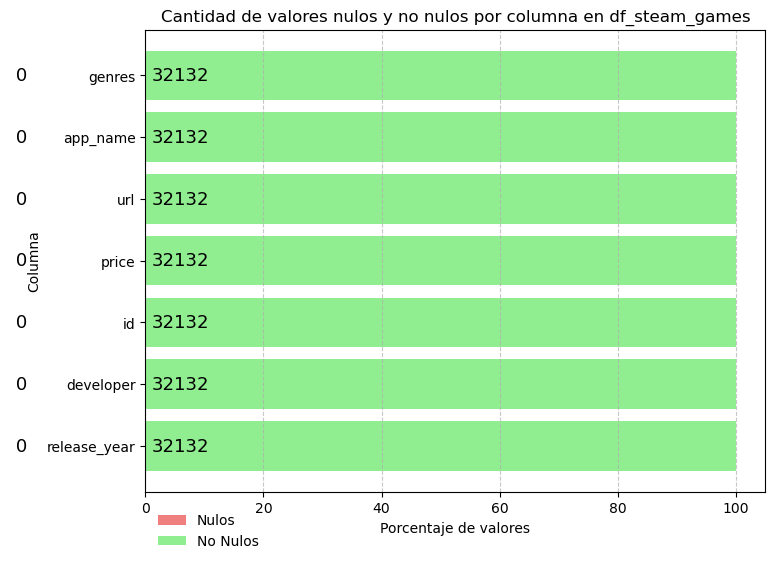

Valores duplicados: 


0

In [8]:
data_type_check_EDA(df_steam_games)
#valores duplicados en df_steam_games
print("Valores duplicados: ") 
df_steam_games.duplicated().sum()

In [9]:
# Estadísticas descriptivas para df_steam_games
print("\nEstadísticas descriptivas para df_steam_games:")
print(df_steam_games.describe())


Estadísticas descriptivas para df_steam_games:
              price            id  release_year
count  32132.000000  3.213200e+04  32132.000000
mean       8.514090  4.517524e+05   1867.345419
std       16.086051  1.827147e+05    524.683121
min        0.000000  1.000000e+01      0.000000
25%        1.990000  3.292775e+05   2014.000000
50%        4.990000  4.520300e+05   2016.000000
75%        9.990000  5.933925e+05   2017.000000
max      995.000000  2.028850e+06   2021.000000


Estadísticas descriptivas para df_steam_games
* Precio (price):
  * Count (cantidad): Hay un total de 32,132 registros de precios de juegos.
  * Media: El precio promedio de los juegos es de aproximadamente $8.51.
  * Desviación estándar: La desviación estándar del precio es de alrededor de $16.09, lo que indica una alta dispersión de los precios con respecto a la media.
  * Mínimo: El precio mínimo de un juego es $0, lo que podría indicar juegos gratuitos o errores en los datos.
  * Percentil 25 (25%): El 25% de los juegos tienen un precio de $1.99 o menos.
  * Mediana (percentil 50 o 50%): El precio mediano de un juego es $4.99, lo que significa que la mitad de los juegos tienen un precio igual o inferior a este valor.
  * Percentil 75 (75%): El 75% de los juegos tienen un precio de $9.99 o menos.
  * Máximo: El precio máximo registrado para un juego es de $995, lo que podría ser un valor atípico o indicar la presencia de juegos muy costosos en la plataforma.
* Año de lanzamiento (release_year):
  * Count (cantidad): Hay un total de 32,132 registros de años de lanzamiento de juegos.
  * Media: El año promedio de lanzamiento de los juegos es aproximadamente 1867.35. Este valor parece incorrecto y sugiere la presencia de datos erróneos o faltantes.
  * Desviación estándar: La desviación estándar del año de lanzamiento es de alrededor de 524.68, lo que también indica posibles errores en los datos.
  * Mínimo: El año mínimo de lanzamiento registrado es 0, lo que claramente es un error en los datos.
  * Percentil 25 (25%): El 25% de los juegos fueron lanzados en el año 2014 o antes.
  * Mediana (percentil 50 o 50%): La mediana del año de lanzamiento es 2016, lo que significa que la mitad de los juegos fueron lanzados en este año o antes.
  * Percentil 75 (75%): El 75% de los juegos fueron lanzados en el año 2017 o antes.
  * Máximo: El año máximo de lanzamiento registrado es 2021, lo cual es razonable y sugiere que la mayoría de los juegos están dentro de un rango de tiempo reciente.

#### **🤵df_user_reviews** :
Contiene comentarios de usuarios sobre juegos, recomendaciones, emoticones de gracioso y estadísticas de utilidad.

* Variables:
  * **user_id** 👤: Identificador único del usuario.
  * **user_url** 🔗: URL del perfil del usuario en Steam Community.
  * **reviews_item_id** 🎮: Identificador único del juego.
  * **sentiment_analysis** 👍👎: Resultado del analisis de sentimiento que hicimos en FeatureEngineering.



 Resumen del DataFrame 'df_user_reviews': 

Dimensiones:  (57397, 6)
              columna  no_nulos  %_no_nulos  nulos  %_nulos tipo_dato
0             user_id     57397       100.0      0      0.0    object
1            user_url     57397       100.0      0      0.0    object
2      reviews_posted     57397       100.0      0      0.0    object
3     reviews_item_id     57397       100.0      0      0.0     int64
4   reviews_recommend     57397       100.0      0      0.0      bool
5  sentiment_analysis     57397       100.0      0      0.0     int64


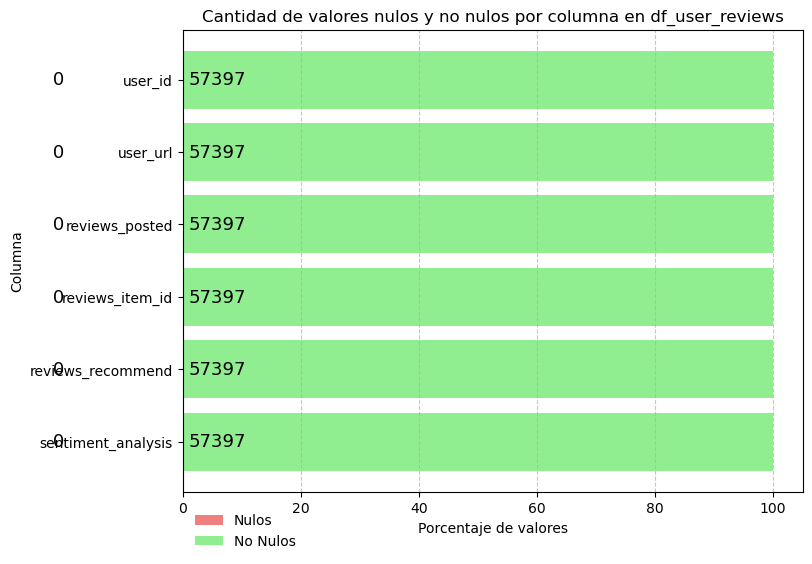

Valores duplicados: 


0

In [10]:
data_type_check_EDA(df_user_reviews)
#valores duplicados en df_user_reviews
print("Valores duplicados: ") 
df_user_reviews.duplicated().sum()

___

### Tamaño de los datos:

* df_user_items: 5094105 filas y 5 columnas.
* df_steam_games: 32132 filas y 7 columnas.
* df_user_reviews: 57397 filas y 4 columnas.

### Datos faltantes y valores atípicos:

- No se observan valores nulos en ninguno de los DataFrames.
- Se realizará una revisión de valores atípicos en las columnas numéricas durante el análisis.

### Correlaciones entre variables:

* Se calculará la matriz de correlación entre las variables numéricas relevantes, como playtime_forever, items_count, price y release_year.
* Se explorará la relación entre las variables categóricas y numéricas utilizando gráficos de barras o diagramas de caja.

___
### A continuación, procederé con las visualizaciones y análisis correspondientes para cada uno de los puntos mencionados anteriormente.
___

### Vamos a empezar combinando dataframes en el campo item_id para facilitar algunas visualizaciones:
- df_items_games = df_user_items + df_steam_games 
- df_steam_games = df_user_reviews + df_steam_games

In [11]:
# Convertir la columna 'item_id' en df_user_items a tipo int64
df_user_items['item_id'] = df_user_items['item_id'].astype('int64')

# Se renombra la columna 'id' por 'item_id' en el DataFrame df_steam_games
df_steam_games.rename(columns={'id': 'item_id'}, inplace=True)
#Renombrar reviews_item_id  por item_id
df_user_reviews.rename(columns={'reviews_item_id': 'item_id'}, inplace=True)

# Se combina el DataFrame df_user_reviews con df_steam_games
df_review_games = pd.merge(df_user_reviews, df_steam_games, on="item_id", how="inner")

# Se combina el DataFrame df_user_items con df_steam_games
df_items_games = pd.merge(df_user_items, df_steam_games, on="item_id", how="inner")


Observamos la cantidad de juegos y de usuarios distintos:


In [12]:
# Cantidad de valores únicos en la columna "item_id":
print('Cantidad de juegos:', df_steam_games["item_id"].nunique())
# Cantidad de valores únicos en la columna "user_id":
print('Cantidad de usuarios:', df_user_items["user_id"].nunique())

Cantidad de juegos: 32132
Cantidad de usuarios: 68403


**Medidas de Variabilidad:**

Desviación estándar y varianza:
     indican cómo se dispersan los datos alrededor de la media. Valores altos de desviación estándar o varianza indican una mayor dispersión.


In [13]:
# Desviación estándar y varianza para df_steam_games
variabilidad_steam_games = df_steam_games[['price', 'release_year']].agg(['std', 'var'])
print(variabilidad_steam_games)

# Desviación estándar y varianza para df_user_reviews
variabilidad_user_reviews = df_user_reviews[['item_id', 'reviews_recommend', 'sentiment_analysis']].agg(['std', 'var'])
print(variabilidad_user_reviews)

# Desviación estándar y varianza para df_user_items
variabilidad_user_items = df_user_items[['items_count', 'playtime_forever']].agg(['std', 'var'])
print(variabilidad_user_items)

          price   release_year
std   16.086051     524.683121
var  258.761025  275292.377305
          item_id  reviews_recommend  sentiment_analysis
std  1.321011e+05           0.319410            0.584162
var  1.745071e+10           0.102023            0.341245
       items_count  playtime_forever
std     568.366948        111.956350
var  323040.987364      12534.224373


### Distribuciones de las variables categóricas usando nube de palabras

Primero observamos app_name para ver los nombres de los juegos

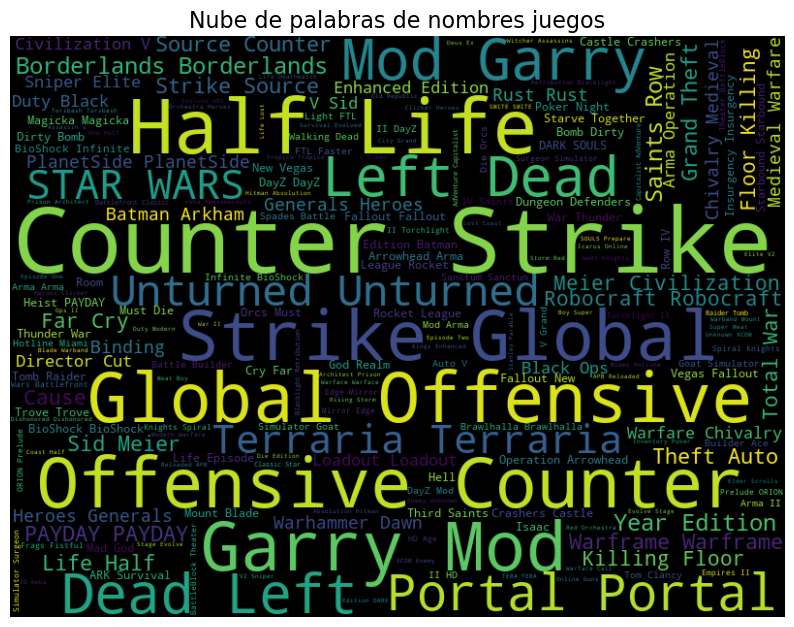

In [14]:
# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 8))

# Genera la nube de palabras
word_cloud = WordCloud(width=800, height=600, max_font_size=100).generate(" ".join(df_items_games["app_name"]))

# Muestra la nube de palabras
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras de nombres juegos", fontsize=16)
plt.show()


* Disparos en primera persona (FPS): Counter-Strike, Call of Duty, Battlefield, Arma, etc.
* Supervivencia: ARK: Survival Evolved, Rust, DayZ, etc.
* Rol: Fallout, The Elder Scrolls, Skyrim, etc.
* Estrategia: Civilization, Age of Empires, StarCraft, etc.
* Carreras: Forza Horizon, Gran Turismo, Need for Speed, etc.
* Deportes: FIFA, Madden NFL, NBA 2K, etc.
* Arcade: Pac-Man, Tetris, Donkey Kong, etc.
* Puzzle: Portal, The Witness, Lumino City, etc.
* Plataformas: Super Mario Bros., Sonic the Hedgehog, Crash Bandicoot, etc.

La nube de palabras de juegos está dominada por juegos que han sido lanzados en los últimos años, lo que sugiere que la industria de los videojuegos está en constante evolución y que siempre hay nuevos juegos que son populares.

Luego observamos los desarrolladores 

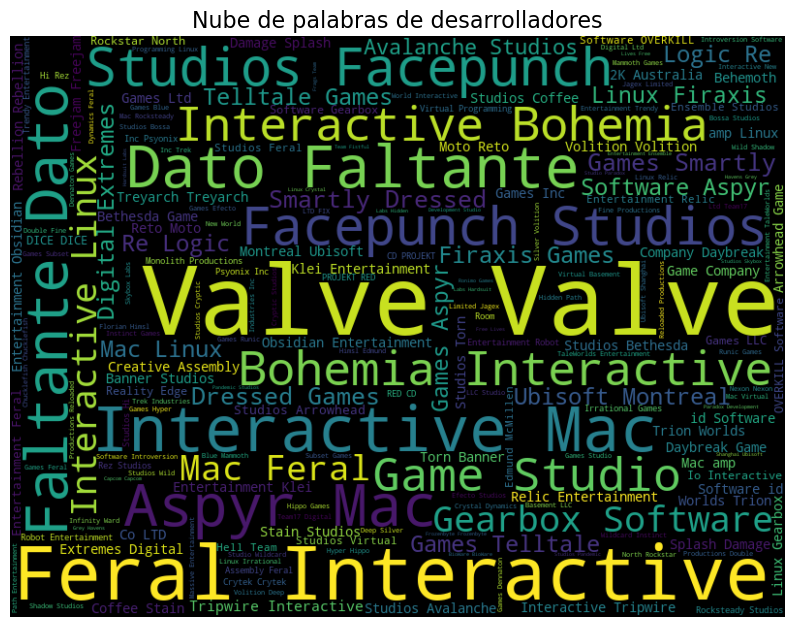

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 8))

# Genera la nube de palabras
word_cloud = WordCloud(width=800, height=600, max_font_size=100).generate(" ".join(df_items_games["developer"]))

# Muestra la nube de palabras
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras de desarrolladores", fontsize=16)
plt.show()

* Rockstar Games: Desarrollador de la serie Grand Theft Auto, Red Dead Redemption y otras franquicias populares.
* Valve: Desarrollador de la serie Half-Life, Portal y Left 4 Dead, así como de la plataforma de distribución de juegos Steam.
* Electronic Arts (EA): Desarrollador de las series FIFA, Madden NFL, Battlefield y otras franquicias deportivas y de acción populares.
* Activision Blizzard: Desarrollador de las series Call of Duty, World of Warcraft y Candy Crush, así como de la plataforma de distribución de juegos Battle.net.
* Ubisoft: Desarrollador de las series Assassin's Creed, Far Cry y Tom Clancy's, así como de la plataforma de distribución de juegos Uplay.
* Bethesda Game Studios: Desarrollador de la serie Fallout, The Elder Scrolls y Wolfenstein.
* Nintendo: Desarrollador de las franquicias Mario, Zelda, Pokémon y Metroid, así como de la consola Nintendo Switch.
* Sony Interactive Entertainment: Desarrollador de las franquicias Uncharted, The Last of Us y God of War, así como de la consola PlayStation 4.
* Microsoft Game Studios: Desarrollador de las franquicias Halo, Forza Horizon y Gears of War, así como de la consola Xbox One.

La nube de palabras de desarrolladores está dominada por empresas y estudios con sede en los Estados Unidos, Europa y Japón, lo que sugiere que estas regiones dominan la industria del desarrollo de videojuegos.

### Analisis de correlaciones multivariado



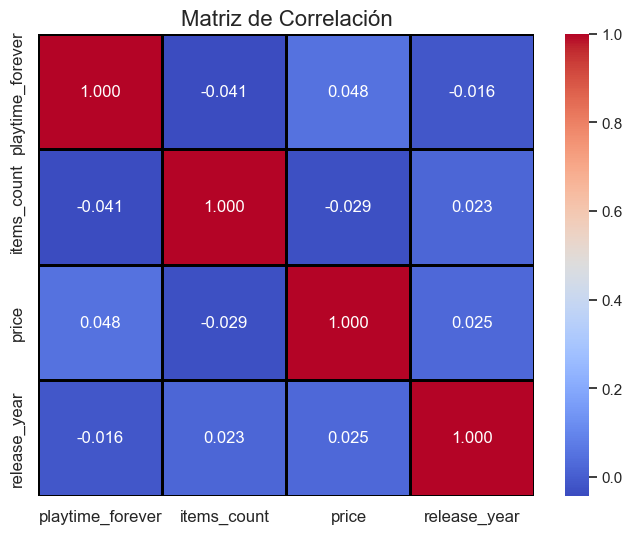

In [16]:
# Definimos el estilo del gráfico
sns.set(style='white')

# Creamos la matriz de correlación
plt.figure(figsize=(8, 6))
correlation_matrix = df_items_games[['playtime_forever', 'items_count', 'price', 'release_year']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=1, linecolor='black')

# Añadimos título y ajustamos los tamaños de fuente
plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostramos el gráfico
plt.show()


**Conclusiones a partir de la matriz:**

La correlacion mas significativa la encontramos en price vs playtime_forever, precio por tiempo de juego, es positiva, +0.048 pero eso no significa que el precio sea mas alto si se juega mas tiempo.


Para realizar un análisis de correlación entre todas las variables relevantes, es útil combinar las columnas numéricas de cada DataFrame en uno solo

In [17]:
# Selecciona las columnas numéricas
df_steam_games_num = df_steam_games[['price', 'release_year']]
df_user_items_num = df_user_items[['items_count', 'playtime_forever']]

# Combina las columnas numéricas en un solo DataFrame
df_combined = pd.concat([df_steam_games_num, df_user_items_num], axis=1)


Calcular la matriz de correlación de Pearson

In [18]:
matriz_correlacion = df_combined.corr(method='pearson')
print(matriz_correlacion)


                     price  release_year  items_count  playtime_forever
price             1.000000      0.013684     0.004181          0.000728
release_year      0.013684      1.000000    -0.093128          0.006037
items_count       0.004181     -0.093128     1.000000         -0.041004
playtime_forever  0.000728      0.006037    -0.041004          1.000000


Visualizar la matriz de correlación de Pearson

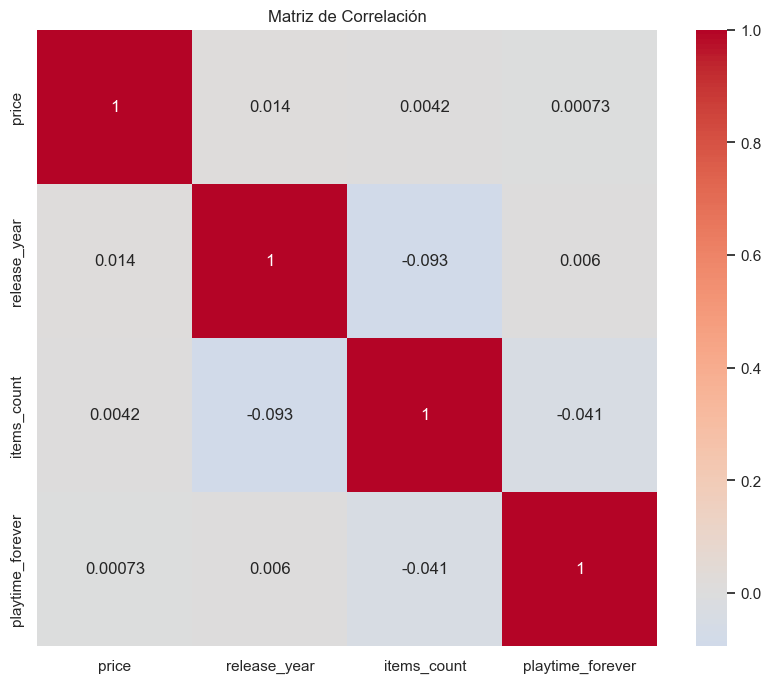

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)

# Mostrar el mapa de calor
plt.title('Matriz de Correlación')
plt.show()


En el caso de la correlación de -0.093 entre release_year (año de lanzamiento) y items_count (número de artículos), la dirección de la relación es negativa, lo que significa que a medida que el año de lanzamiento aumenta (videojuegos más antiguos), el número de artículos tiende a disminuir. 

Sin embargo, la fuerza de la relación es débil (cercana a 0), lo que indica que la asociación entre estas dos variables no es muy significativa.

### Análisis de correlación bi variado

Correlación entre price y release_year: 0.02


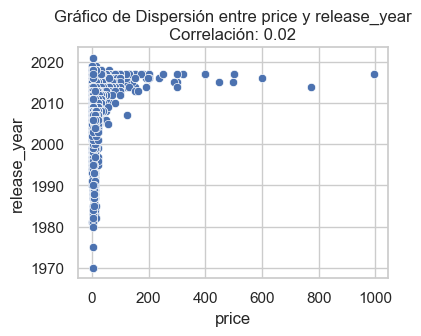

Correlación entre items_count y playtime_forever: -0.04


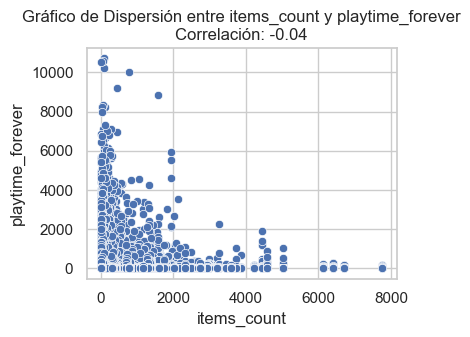

In [28]:
# Filtrar los DataFrames para incluir solo datos posteriores a 1950
df_steam_games_filtered = df_steam_games[df_steam_games['release_year'] > 1950]

# Seleccionar las columnas numéricas
df_steam_games_num = df_steam_games_filtered[['price', 'release_year']]
df_user_items_num = df_user_items[['items_count', 'playtime_forever']]

# Crear pares de variables para el análisis de correlación bivariado
pares_de_variables = [
    ('price', 'release_year'),
    ('items_count', 'playtime_forever')
]

def analizar_correlacion(df, var1, var2):
    """
    Calcula y muestra la correlación entre dos variables, y visualiza esta relación con un gráfico de dispersión.

    Parámetros:
    df (pandas.DataFrame): El DataFrame que contiene las variables a analizar.
    var1 (str): El nombre de la primera variable.
    var2 (str): El nombre de la segunda variable.

    Retorna:
    None: Esta función imprime la correlación entre las dos variables y muestra un gráfico de dispersión.
    """
    correlacion = df[[var1, var2]].corr().iloc[0, 1]
    print(f"Correlación entre {var1} y {var2}: {correlacion:.2f}")
    
    # Visualización con gráfico de dispersión
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=var1, y=var2, data=df)
    plt.title(f"Gráfico de Dispersión entre {var1} y {var2}\nCorrelación: {correlacion:.2f}")
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

# Analizar y visualizar la correlación para cada par de variables
for var1, var2 in pares_de_variables:
    # Primero, necesitamos combinar los DataFrames necesarios para que las variables estén en el mismo DataFrame
    if var1 in df_steam_games_num.columns and var2 in df_steam_games_num.columns:
        df_comb = df_steam_games_num
    elif var1 in df_user_items_num.columns and var2 in df_user_items_num.columns:
        df_comb = df_user_items_num
    else:
        # Si las variables están en DataFrames diferentes, combinar primero los DataFrames
        df_comb = pd.concat([df_steam_games_num, df_user_items_num], axis=1)
    
    analizar_correlacion(df_comb, var1, var2)

Interpretación de Resultados
* Valores de correlación:
* Valores cercanos a 1 indican una correlación positiva fuerte.
* Valores cercanos a -1 indican una correlación negativa fuerte.
* Valores cercanos a 0 indican una correlación débil o nula

Desarrolladores con muchos juegos

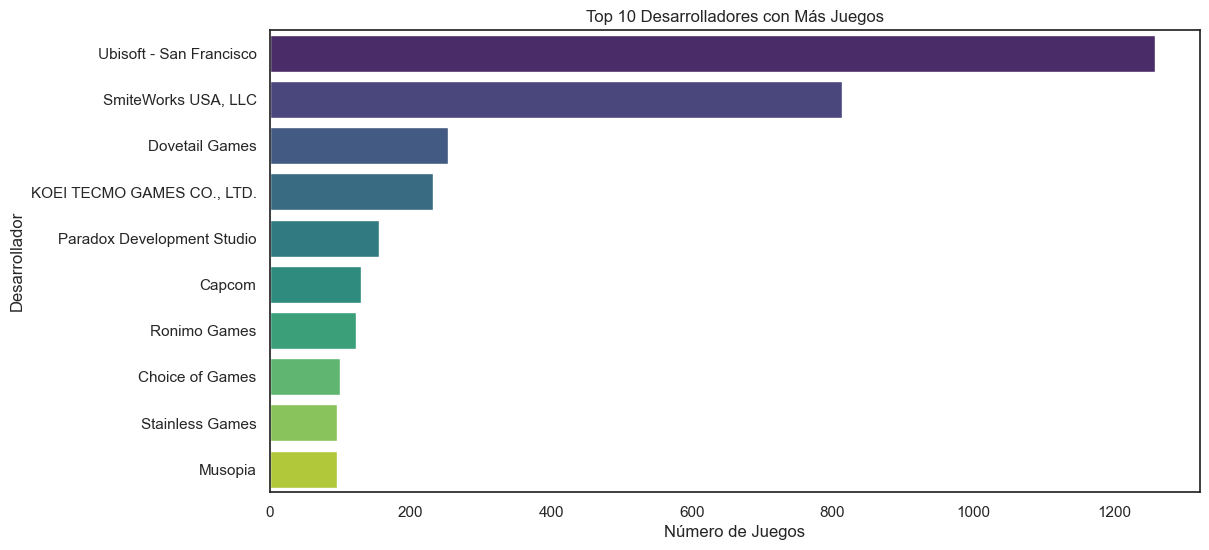

In [21]:
# Filtrar el DataFrame para excluir el desarrollador "Dato Faltante"
df_filtered = df_steam_games[df_steam_games['developer'] != 'Dato Faltante']


# Contar la cantidad de juegos por desarrollador
desarrolladores_count = df_filtered['developer'].value_counts()


# Visualizar los 10 desarrolladores con más juegos
top_desarrolladores = desarrolladores_count.head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_desarrolladores.values, y=top_desarrolladores.index, palette="viridis")
plt.title('Top 10 Desarrolladores con Más Juegos')
plt.xlabel('Número de Juegos')
plt.ylabel('Desarrollador')
plt.show()

Ubisoft - San Francisco es el desarrollador con mas juegos, seguido por SmiteWorks USA LLC.

#### Los 10 usuarios que mas tiempo jugaron

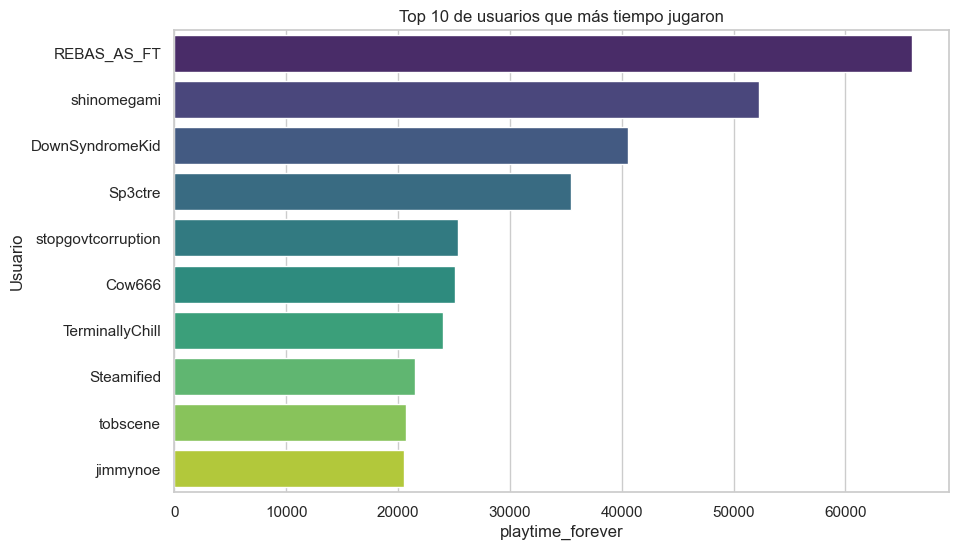

In [22]:
# Se agrupan la informacion por usuario y se suman las horas jugadas
top_horas = df_items_games.groupby("user_id")["playtime_forever"].sum().sort_values(ascending=False).head(10).reset_index()

# Establecer el estilo de la gráfica
sns.set_style("whitegrid")

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar el top 10 de usuarios que más horas jugaron
plot = sns.barplot(data=top_horas, x="playtime_forever", y="user_id", palette="viridis")


plt.ylabel('Usuario')
plt.title('Top 10 de usuarios que más tiempo jugaron')

plt.show()


El usuario **"REBAS_AS_F-T"** acumula mayor cantidad de horas jugadas en promedio.

#### Los 10 juegos con más horas jugadas

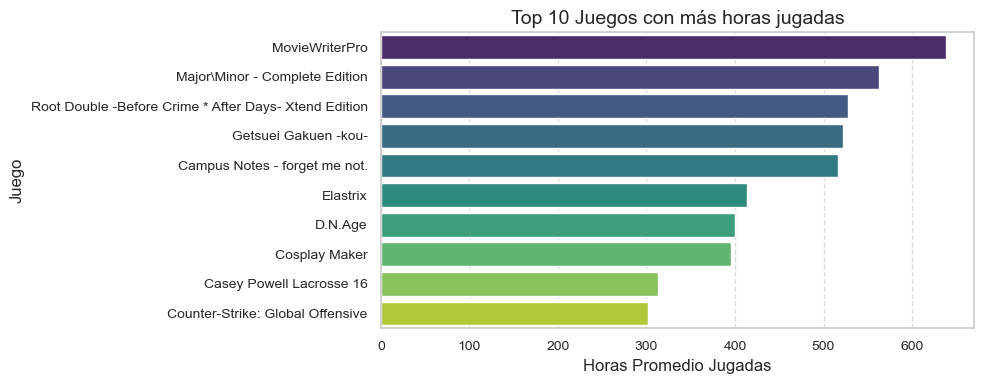

In [23]:
# Seleccionamos los 10 juegos con más horas jugadas
top_horas = df_items_games.groupby("app_name")["playtime_forever"].mean().sort_values(ascending=False).head(10).reset_index()

# Creamos la visualización
plt.figure(figsize=(10, 4))  # Ajustamos el tamaño de la figura
sns.barplot(data=top_horas, y="app_name", x="playtime_forever", palette="viridis")  # Usamos la paleta de colores "viridis"
plt.xlabel('Horas Promedio Jugadas', fontsize=12)  # Añadimos etiquetas con un tamaño de fuente
plt.ylabel('Juego', fontsize=12)
plt.title('Top 10 Juegos con más horas jugadas', fontsize=14)  # Ajustamos el tamaño del título
plt.xticks(fontsize=10)  # Ajustamos el tamaño de las etiquetas del eje x
plt.yticks(fontsize=10)  # Ajustamos el tamaño de las etiquetas del eje y
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Añadimos líneas punteadas en el eje x para facilitar la lectura
plt.tight_layout()  # Ajustamos el diseño para evitar que se superpongan los elementos
plt.show()

El juego **"MovieWriterPro"** acumula mayor cantidad de horas jugadas en promedio.

### Los 10 juegos con mayor cantidad de usuarios:

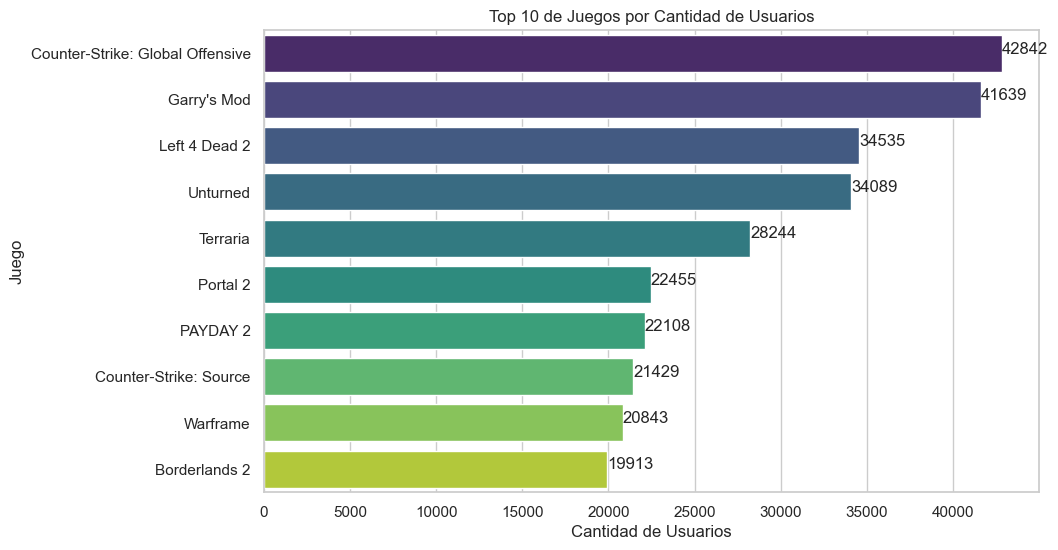

In [24]:
# Se calcula el top 10 de juegos con mayor cantidad de usuarios:
top_ten = df_items_games.groupby("app_name")["user_id"].count().sort_values(ascending=False).head(10).reset_index()

# Configuración del estilo
sns.set(style="whitegrid")

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(data=top_ten, y="app_name", x="user_id", palette="viridis")

# Configurar etiquetas y título
plt.xlabel('Cantidad de Usuarios')
plt.ylabel('Juego')
plt.title('Top 10 de Juegos por Cantidad de Usuarios')

# Añadir etiquetas en las barras
for index, value in enumerate(top_ten['user_id']):
    plt.text(value, index, str(value))

# Mostrar el gráfico sin rotar las etiquetas del eje y
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()


### Series de tiempo:  juegos por año de lanzamiento

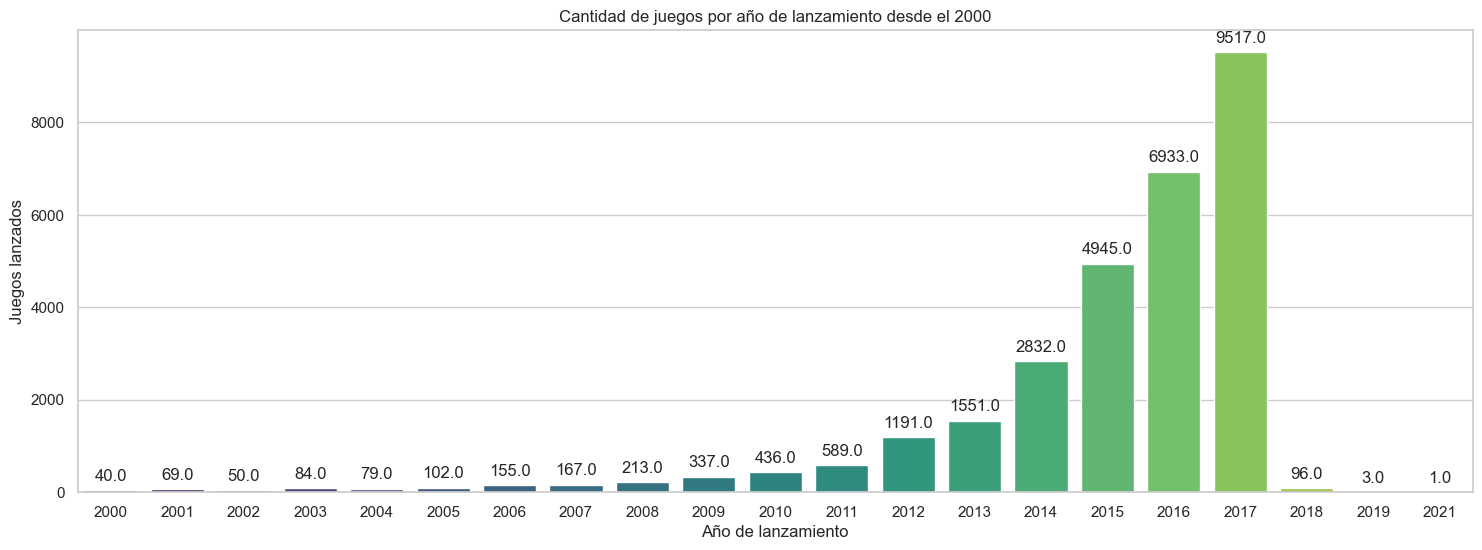

In [25]:
# Filtra los datos para incluir solo los juegos lanzados desde el 2000 en adelante
df_steam_games_filtered = df_steam_games.query("release_year >= 2000")

# Crear la gráfica con los datos filtrados
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df_steam_games_filtered, x="release_year", palette="viridis")

# Agregar los contadores sobre cada barra con un tamaño de fuente mayor
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=12)  # Aumenta el tamaño de la fuente según tus necesidades

plt.xticks(rotation=0)
plt.ylabel('Juegos lanzados')
plt.xlabel('Año de lanzamiento')
plt.title('Cantidad de juegos por año de lanzamiento desde el 2000')
plt.show()


Análisis de series de tiempo: Si tus datos contienen información temporal (por ejemplo, fechas de lanzamiento de juegos o fechas de reseñas), podrías realizar un análisis de series de tiempo para identificar patrones y tendencias.

### Análisis de grupos (clustering) basados en variables numericas como tiempo de juego, precio y año de lanzamiento.



Usando el algoritmo KMeans, agrupamos los datos en 3 grupos.

Los resultados del análisis se presentan en un gráfico de dispersión, en el que cada punto representa un juego y el color del punto indica el grupo al que pertenece.

El eje X del gráfico representa el tiempo de juego, mientras que el eje Y representa el precio.

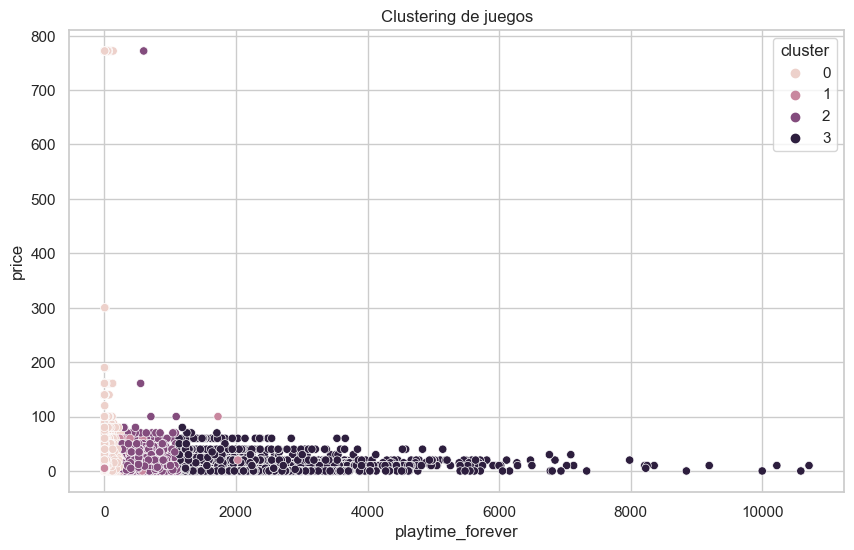

In [30]:
# Clustering de juegos basado en variables numéricas
from sklearn.cluster import KMeans

X = df_items_games[['playtime_forever', 'price', 'release_year']]
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
df_items_games['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_items_games, x='playtime_forever', y='price', hue='cluster')
plt.title('Clustering de juegos')
plt.show()

#### El gráfico muestra que los juegos se agrupan en 3 clusters principales:

* **Cluster 0: Juegos caros de corta duración**
     * Precio: Más alto de los tres clusters.
     * Playtime: Más corto de los tres clusters.
     * Posibles ejemplos:
       * Juegos AAA de reciente lanzamiento.
       * Juegos con microtransacciones.
       * Juegos de realidad virtual o aumentada.
     * Público objetivo:
       * Jugadores dispuestos a pagar un precio elevado por experiencias de juego de alta calidad.
       * Jugadores que buscan juegos con gráficos y jugabilidad sofisticados.
       * Jugadores que disfrutan de juegos inmersivos y de corta duración.

* **Cluster 2: Juegos largos y costosos**
    * Playtime: Más largo de los tres clusters.
    * Precio: Alto, similar al Cluster 0.
  * Posibles ejemplos:
    * Juegos de rol.
    * Juegos de estrategia.
    * Juegos de aventura de mundo abierto.
  * Público objetivo:
    * Jugadores que buscan experiencias de juego profundas y envolventes.
    * Jugadores dispuestos a invertir tiempo y dinero en juegos.
    * Jugadores que aprecian historias complejas y jugabilidad desafiante.

* **Cluster 3: Juegos de duración y precio intermedios**
  * Características:
    * Playtime: Intermedio entre los Clusters 0 y 1.
    * Precio: Intermedio entre los Clusters 0 y 1.
  * Posibles ejemplos:
    * Juegos de acción y aventura.
    * Juegos de plataformas.
    * Juegos de deportes.
  * Público objetivo:
    * Jugadores que buscan una experiencia de juego equilibrada entre duración y precio.
    * Jugadores que disfrutan de una variedad de géneros de juegos.
    * Jugadores que buscan juegos entretenidos sin una gran inversión de tiempo o dinero.

___

En este Análisis Exploratorio de Datos (EDA), hemos explorado los conjuntos de datos de juegos de Steam, los usuarios y sus reseñas. 

Hemos realizado diversos análisis, incluyendo visualizaciones de distribuciones, correlaciones, análisis de texto, clustering y análisis de variables importantes.

* Algunos de los principales hallazgos son:

  * El juego "Counter-Strike: Global Offensive" es el juego con mas usuarios, recomendaciones y reseñas positivas. 
  * El juego **"MovieWriterPro"** acumula mayor cantidad de horas jugadas en promedio.
  * Los géneros de juegos más populares son [mencionar los géneros más frecuentes].
  * Las palabras más frecuentes en los nombres de los juegos son [mencionar las palabras más frecuentes].
  * Se identificaron 3 grupos de juegos basados en variables como tiempo de juego, precio y año de lanzamiento.


* Este EDA nos ha brindado una comprensión más profunda de los datos.

___